In [1]:
# | eval: false
import warnings

import datasets
from IPython.display import Markdown
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import polars as pl
import pandas as pd
import seaborn as sns
import transformers
from datasets import load_dataset
from transformers import AutoTokenizer

warnings.filterwarnings('ignore')
sns.set_theme("notebook")
transformers.logging.set_verbosity_error()
datasets.logging.set_verbosity_error()
datasets.utils.disable_progress_bars()

In [2]:
# | eval: false
ds = load_dataset("JuDDGES/nsa", split="train")

Repo card metadata block was not found. Setting CardData to empty.


# Dataset Card for [JuDDGES/nsa](https://huggingface.co/datasets/JuDDGES/nsa)

## Table of Contents
- [Table of Contents](#table-of-contents)
- [Dataset Description](#dataset-description)
  - [Dataset Summary](#dataset-summary)
  - [Supported Tasks and Leaderboards](#supported-tasks-and-leaderboards)
  - [Languages](#languages)
- [Dataset Structure](#dataset-structure)
  - [Data Instances](#data-instances)
  - [Data Fields](#data-fields)
  - [Data Splits](#data-splits)
- [Dataset Creation](#dataset-creation)
  - [Curation Rationale](#curation-rationale)
  - [Source Data](#source-data)
  - [Annotations](#annotations)
  - [Personal and Sensitive Information](#personal-and-sensitive-information)
- [Considerations for Using the Data](#considerations-for-using-the-data)
  - [Social Impact of Dataset](#social-impact-of-dataset)
  - [Discussion of Biases](#discussion-of-biases)
  - [Other Known Limitations](#other-known-limitations)
- [Additional Information](#additional-information)
  - [Dataset Curators](#dataset-curators)
  - [Licensing Information](#licensing-information)
  - [Citation Information](#citation-information)
  - [Contributions](#contributions)
- [Statistics](#statistics)

## Dataset Description

* **Homepage: TBA**
* **Repository: [github](https://github.com/pwr-ai/JuDDGES)**
* **Paper:  TBA**
* **Point of Contact: lukasz.augustyniak@pwr.edu.pl; jakub.binkowski@pwr.edu.pl; albert.sawczyn@pwr.edu.pl**

### Dataset Summary

The dataset consists of Supreme Administrative Court of Poland judgements available at [orzeczenia.nsa.gov.pl](https://orzeczenia.nsa.gov.pl/), containing full content of the judgements along with metadata sourced from the official website.

In [3]:
LAST_UPDATED = "2025-03-06"
max_date = max(ds["judgment_date"]).strftime("%Y-%m-%d")

info = "The dataset contains documents up to {max_date}, with the last update on {last_updated}. Some recent documents may be missing. The NSA database is continuously updated, though delays may cause older documents to appear over time."
Markdown(info.replace("{last_updated}", LAST_UPDATED).replace("{max_date}", max_date))

The dataset contains documents up to 2025-03-05, with the last update on 2025-03-06. Some recent documents may be missing. The NSA database is continuously updated, though delays may cause older documents to appear over time.

### Supported Tasks and Leaderboards

### Languages

pl-PL Polish 

## Dataset Structure

### Data Instances

<details>
<summary> Click to expand </summary>

```
{'judgment_id': '/doc/6447E5BA57',
 'docket_number': 'II SA/Op 8/05',
 'judgment_type': 'Wyrok WSA w Opolu',
 'finality': 'orzeczenie prawomocne',
 'judgment_date': datetime.datetime(2005, 10, 13, 0, 0, tzinfo=<DstTzInfo 'Europe/Warsaw' CEST+2:00:00 DST>),
 'submission_date': datetime.datetime(2005, 1, 12, 0, 0, tzinfo=<DstTzInfo 'Europe/Warsaw' CET+1:00:00 STD>),
 'court_name': 'Wojewódzki Sąd Administracyjny w Opolu',
 'judges': ['Grażyna Jeżewska', 'Jerzy Krupiński', 'Teresa Cisyk'],
 'presiding_judge': 'Jerzy Krupiński',
 'judge_rapporteur': 'Teresa Cisyk',
 'case_type_description': ['6192 Funkcjonariusze Policji'],
 'keywords': ['Zatrudnienie', 'Organizacje społeczne', 'Policja'],
 'related_docket_numbers': None,
 'challenged_authority': 'Komendant Policji',
 'decision': ['Uchylono decyzję I i II instancji'],
 'text_legal_bases': [{'link': 'http://isap.sejm.gov.pl/DetailsServlet?id=WDU20020070058',
   'article': 'art. 67 ust. 2',
   'journal': 'Dz.U. 2002 nr 7 poz. 58',
   'law': 'Obwieszczenie Marszałka Sejmu Rzeczypospolitej Polskiej z dnia 10 stycznia 2002 r. w sprawie ogłoszenia jednolitego tekstu ustawy o Policji.'},
  {'link': 'http://isap.sejm.gov.pl/DetailsServlet?id=WDU20010790854',
   'article': 'art. 32 ust. 1-2',
   'journal': 'Dz.U. 2001 nr 79 poz. 854',
   'law': 'Obwieszczenie Marszałka Sejmu Rzeczypospolitej Polskiej z dnia 31 maja 2001 r. w sprawie ogłoszenia jednolitego tekstu ustawy o związkach zawodowych.'}],
 'official_collection': ['ONSAiWSA 2006 4 poz. 116'],
 'glosa_information': None,
 'thesis': 'Przepisy art. 32 ust. 1 i 2 ustawy z dnia 23 maja 1991 r. o związkach zawodowych /Dz.U. 2001 nr 79 poz. 854 ze zm./ nie pozwalają na pozbawienie funkcjonariusza Policji części pobieranego dodatku służbowego w okresie ochronnym po zakończeniu kadencji w zarządzie organizacji związkowej bez zgody zakładowej organizacji związkowej, nawet jeśli wysokość tego dodatku pozostawiona jest uznaniu organu, a jego obniżenie następuje w celu dostosowania wynagrodzenia do stawek obowiązujących na stanowisku, na które powraca funkcjonariusz po wygaśnięciu mandatu członka zarządu organizacji związkowej.',
 'full_text': 'Wojewódzki Sąd Administracyjny w Opolu w składzie następującym: Przewodniczący Sędzia NSA Jerzy Krupiński Sędziowie: Sędzia WSA Teresa Cisyk – (spr.) Asesor sądowy Grażyna Jeżewska Protokolant : sekretarz sądowy Jolanta Hadała po rozpoznaniu w dniu 13 października 2005 r. na rozprawie sprawy ze skargi R. H. na decyzję [...] Komendanta Wojewódzkiego Policji w O. z dnia [...] nr [...] w przedmiocie funkcjonariusza Policji 1) uchyla zaskarżoną decyzję oraz poprzedzającą ją decyzję Komendanta Miejskiego Policji w O. nr [...] z dnia [...], 2) określa, że zaskarżona decyzja nie może być wykonana w całości, 3) zasądza od [...] Komendanta Wojewódzkiego Policji w O. na rzecz R. H. kwotę 255 (dwieście pięćdziesiąt pięć) zł, tytułem zwrotu kosztów zastępstwa procesowego.',
 'reasons_for_judgment': 'Komendant Miejski Policji w O., rozkazem personalnym nr [...], z dnia [...], wydanym na podstawie art. 32 ust. 1 ustawy z dnia 6 kwietnia 1990 r. o Policji (Dz. U. z 2000 r., Nr 7, poz. 58) oraz § 1 i 9 rozporządzenia Ministra Spraw Wewnętrznych i Administracji z 6 grudnia 2001 r. w sprawie szczegółowych zasad otrzymywania i wysokości uposażenia zasadniczego policjantów, dodatków do uposażenia oraz ustalania wysługi lat, od której jest uzależniony wzrost uposażenia zasadniczego (Dz. U. Nr 152, poz. 1732), mianował z dniem 16 września 2004 r. policjanta w służbie stałej – R. H. na stanowisko specjalisty Referatu I Sekcji Dochodzeniowo - Śledczej, w 8 grupie uposażenia zasadniczego z mnożnikiem 1,30 kwoty bazowej w wysokości 1820 zł. miesięcznie i dodatkiem służbowym w kwocie 245 zł. W uzasadnieniu organ przywołał rozkaz personalny [...] Komendanta Wojewódzkiego Policji w O., który przeniósł z urzędu wyżej wymienionego do pełnienia dalszej służby w Komendzie Miejskiej Policji w O., z powodu wygaśnięcia mandatu w zakładowej organizacji związkowej. Komendant Miejski zaakcentował, że jako przełożony, właściwy w sprawach osobowych pozostawił uposażenie w 8 gr. z mnożnikiem 1,30 spełniając tym samym dyspozycję art. 32 ust. 1 i 2 ustawy z dnia 23 maja 1991 r. o związkach zawodowych (Dz. U. z 2001 r. Nr 79, poz. 854), bowiem zgodnie z przywołanym przepisem pracodawca bez zgody zarządu zakładowej organizacji związkowej nie może wypowiedzieć ani rozwiązać stosunku pracy z pracownikiem będącym członkiem zarządu zakładowej w czasie trwania mandatu oraz w okresie roku po jego wygaśnięciu, ani zmienić jednostronnie warunków pracy lub płacy na niekorzyść pracownika, chyba, że dopuszczają to odrębne przepisy. W nawiązaniu do art. 104 ust. 3 o Policji, na stanowiskach innych niż kierownicze, policjant za należyte wykonywanie obowiązków służbowych może otrzymać dodatek służbowy, którego wysokość, zgodnie z § 9 ust. 2 rozporządzenia MSWiA z 6 grudnia 2001 r. w sprawie szczegółowych zasad otrzymywania i wysokości uposażenia zasadniczego policjantów, dodatków do uposażenia..., uzależniona jest od charakteru, zakresu i rodzaju powierzonych zadań i czynności służbowych na zajmowanym stanowisku. Stąd uwzględniając sugestię zakładowej organizacji związkowej przyznano dodatek w wysokości 245 zł. Organ dodał, że dodatek ten może ulec zmianie – podwyższeniu, po ocenie wyników pracy R. H.\n\nOdwołanie od powyższego rozkazu personalnego wniósł R. H., podnosząc, iż w jego sprawie został naruszony art. 32 ust. 2 ustawy o związkach zawodowych oraz zapis Statutu NSZZ Policjantów, regulujący stosunki między pracodawcą a związkami zawodowymi. Zażądał uchylenia w całości w/w aktu i wydania orzeczenia co do istoty sprawy. Uznał, że jego warunki płacowe zostały pogorszone, gdyż zachowane zostały tylko składniki uposażenia z 8 grupy i mnożnik 1,30 natomiast nie przyznano mu dodatku w wysokości dotychczasowej tj. 900 zł., lecz w wysokości 245 zł. Wyraził również zdziwienie, co do daty rozkazu personalnego [...], która wyprzedziła działania Komendanta Wojewódzkiego w sprawie. Ponadto zaskarżonemu rozkazowi zarzucił uchybienie formalne w zakresie uzasadnienia prawnego, przywołując na tą okoliczność art. 107 kpa oraz orzeczenie NSA z 30 czerwca 1983 r. (I SA 178/83).\n\n[...] Komendant Wojewódzki Policji w O., po rozpatrzeniu odwołania, rozkazem personalnym nr [...], z dnia [...], na podstawie art. 138 § 1 pkt 2 kodeksu postępowania administracyjnego, uchylił zaskarżony rozkaz w części dotyczącej daty mianowania i zmienił datę mianowania na stanowisko służbowe na dzień 16 listopada 2004 r. i w pozostałej części utrzymał w mocy. W obszernym uzasadnieniu opisał okoliczność oddelegowania w 1996 r. R. H. z Komendy Rejonowej w O. do Komendy Wojewódzkiej Policji w O., celem wykonywania funkcji z wyboru w Zarządzie Wojewódzkim NSZZ Policjantów a następnie w wyniku wygaśnięcia mandatu w 2004 r. przeniesienie, za zgodą skarżącego do Komendy Miejskiej Policji w O. Organ odwoławczy podkreślił, że dodatek służbowy w wysokości 900 zł., był przyznany skarżącemu w związku z pełnieniem przez niego funkcji w Zarządzie Wojewódzkim NSZZ, gdzie był zwolniony z obowiązku świadczenia służby na okres kadencji a po ponownym przeniesieniu do Komendy Miejskiej otrzymał zmieniony zakres wykonywania obowiązków, stąd uzasadniony jest dodatek w wysokości 245 zł., przy czym przed oddelegowaniem posiadał dodatek w wysokości 130 zł. oraz niższe uposażenie. Dodał, że zgodnie z § 8 ust. 7 w zw. z § 9 ust. 5 przywołanego rozporządzenia, dodatek służbowy może zostać obniżony, także w razie zmiany zakresu obowiązków służbowych, warunków służby bądź ustania innych przesłanek, które uzasadniały przyznanie go w dotychczasowej wysokości. Stwierdził, że skarżący na obecnie zaproponowanym stanowisku, w stosunku do stanowiska zajmowanego przed wyborem do władz związkowych, otrzymuje wyższe uposażenie i nie nastąpiło naruszenie art. 32 ust. 1 i 2 ustawy o związkach zawodowych oraz § 17 ust. 4 Statut NSZZ Policjantów. Odnosząc się do kwestionowanej daty rozkazu, organ odwoławczy przytaczając brzmienie przepisu art. 110 kpa stwierdził, że w świetle tej regulacji data zamieszczona na decyzji nie ma wpływu na poprawność rozpatrzenia sprawy, bowiem decyzja wiąże organ i stronę z jej doręczeniem, a umieszczona data została wpisana omyłkowo.\n\nW skardze do Wojewódzkiego Sadu Administracyjnego w Opolu, R. H. zarzucił decyzji nr [...] Komendanta Wojewódzkiego Policji w O., z dnia [...], naruszenie art. 32 ust. 2 ustawy o związkach zawodowych i wniósł o jej uchylenie. W uzasadnieniu podniósł złamanie prawa poprzez naruszenie wyżej powołanego przepisu, bowiem Komendant Miejski Policji w O. nie uzyskał zgody zakładowej organizacji związkowej na zmianę warunków płacy, a nawet o taką zgodę nie występował, co jest warunkiem koniecznym. Skarżący na ta okoliczność przywołał wyrok NSA z 28 maja 1993 r. II SA 1425/92 (ONSA 1994/3/96). Zaakcentował, że przez jeden rok po upływie kadencji w organach związku zawodowego, przysługuje związkowcowi ustawowa ochrona w zakresie utrzymania warunków płacy i służby.\n\nW odpowiedzi na skargę [...] Wojewódzki Komendant Policji w O. wniósł o jej oddalenie, podtrzymując argumentację zawartą w zaskarżonej decyzji, iż wynagrodzenie skarżącego, w tym dodatek służbowy, który jest składnikiem fakultatywnym, jest wyższe od otrzymywanego przed oddelegowaniem do pełnienia funkcji w związku zawodowym. Dodatkowo zaakcentował, że skarżący z oddelegowania wrócił do macierzystej jednostki, gdzie średnia wysokość dodatku służbowego wynosi 283 zł., zatem nie nastąpiło naruszenie przepisu art. 32 ustawy o związkach zawodowych. Ponadto specyfika służbowego stosunku pracy w policji uniemożliwia bezpośrednie stosowanie przywołanego przepisu, na co wskazuje krytyczna glosa do uchwały SN z 4 lutego 1993 r. III AZP 38/92 (OSP 1994/3/38).\n\nWojewódzki Sąd Administracyjny zważył, co następuje:\n\nNa zasadzie art. 1 § 1 ustawy z dnia 25 lipca 2002 r. – Prawo o ustroju sądów administracyjnych (Dz. U. Nr 153, poz. 1269 ze zm.), sądy administracyjne sprawują wymiar sprawiedliwości przez kontrolę działalności administracji publicznej oraz rozstrzygają spory kompetencyjne i o właściwość między organami jednostek samorządu terytorialnego, samorządowymi kolegiami odwoławczymi i między tymi organami a organami administracji rządowej. Kontrola, o której mowa wyżej, sprawowana jest pod względem zgodności z prawem, jeżeli ustawy nie stanowią inaczej (art. 1 § 2). Oznacza to, że badaniu w postępowaniu sądowym, podlega prawidłowość zastosowania przepisów prawa w odniesieniu do istniejącego w sprawie stanu faktycznego oraz trafność wykładni tych przepisów. Uwzględnienie skargi następuje w przypadku naruszenia prawa materialnego, które miało wpływ na wynik sprawy, naruszenia prawa dającego podstawę do wznowienia postępowania administracyjnego lub innego naruszenia przepisów postępowania, jeśli mogło mieć ono istotny wpływ na wynik sprawy (art. 145 § 1 pkt. 1 ustawy z dnia 30 sierpnia 2002 r. – Prawo o postępowaniu przed sądami administracyjnymi – Dz. U. nr 153, poz. 1270). Sąd administracyjny ocenia, czy zaskarżona decyzja jest zgodna z prawem, przy czym rozważa prawo obowiązujące w dniu jej wydania jak i stan sprawy istniejący na dzień wydania decyzji.\n\nRozpatrując stan faktyczny i prawny niniejszej sprawy Sąd uznał, że skarga zasługuje na uwzględnienie.\n\nOrgany administracji publicznej, w tym przypadku Komendant Wojewódzki oraz Komendant Miejski w O. przedmiotową sprawę prowadzili w oparciu o przepisy ustawy z dnia 6 kwietnia 1990 r. o Policji (Dz. U. z 2000 r., Nr 7, poz. 58). Bezsporną okolicznością w rozpoznawanej sprawie jest dochowanie właściwości organów wydających zaskarżone raporty personalne w sprawie uposażenia, które posiadają przymiot decyzji administracyjnych oraz fakt, iż organ odwoławczy podzielił stanowisko organu pierwszej instancji w przedmiotowej sprawie. Określenie uposażenia dla skarżącego policjanta – R. H., nastąpiło zaskarżonymi aktami, w wyniku realizacji rozkazu personalnego [...] Komendanta Wojewódzkiego Policji w O., w związku z przeniesieniem skarżącego, za jego zgodą do macierzystej jednostki, z powodu wygaśnięcia mandatu V-ce Przewodniczącego Zarządu Wojewódzkiego NSZZ Policjantów województwa [...].\n\nZgodnie z art. 100 ustawy o Policji, uposażenie policjanta składa się z uposażenia zasadniczego i z dodatków do uposażenia. Skarżący nie kwestionuje zaproponowanego uposażenia zasadniczego, które pozostało w takiej samej wysokości, jakie otrzymywał pełniąc funkcję w zarządzie zakładowej organizacji związkowej, stąd w dalszych rozważaniach ten element wynagrodzenia zostanie pominięty. Kwestionuje natomiast dodatek służbowy w zaskarżonych rozkazach personalnych, bowiem zaproponowano skarżącemu ten dodatek w wysokość 245 zł. a nie 900 zł, czyli w dotychczasowej wysokości, co zdaniem skarżącego spowodowało, iż jego płaca miesięczna została przez pracodawcę zmieniona na niekorzyść. Skarżący podnosił w odwołaniu oraz w skardze, iż na podstawie art. 67 ust. 2 ustawy o Policji i art. 32 ustawy o związkach zawodowych, podlega ochronie przed niekorzystną zmianą warunków płacy, przez okres jednego roku po wygaśnięciu mandatu w zarządzie zakładowej organizacji związkowej.\n\nW pierwszej kolejności należało wypowiedzieć się czy skarżący, podlegał ochronie związkowej, na co wskazywał w toczącym się postępowaniu administracyjnym i sądowym. Za punkt wyjścia należy przyjąć przepis art. 67 ust. 2 o Policji, który stanowi, iż przepisy ustawy o związkach zawodowych stosuje się odpowiednio, z zastrzeżeniem ze w policji może działać tylko jeden związek zawodowy i związek ten nie ma prawa do strajku. Z przytoczonego brzmienia przepisu wynika wyraźnie, w jakich sprawach dotyczących policji zostały wyłączone przepisy o związkach zawodowych, a zatem w sprawach objętych niniejszym rozpoznaniem będą miały zastosowanie przepisy ustawy związkowej. Przechodząc zatem do przepisu art. 32 ust. 1 pkt 2 ustawy o związkach zawodowych, należy podkreślić, że pracodawca nie może bez zgody zarządu zakładowej organizacji związkowej zmienić jednostronnie warunków pracy i płacy na niekorzyść pracownika będącego członkiem zarządu lub komisji rewizyjnej zakładowej organizacji związkowej, z wyjątkiem gdy dopuszczają to odrębne przepisy. Na zasadzie art. art. 32 ust. 2 ustawy związkowej, ochrona dotyczy trwania mandatu oraz w okresie roku po jego wygaśnięciu.\n\nOdnosząc powyższą regulację do opisanego stanu faktycznego, należy stwierdzić, iż orzekające organy nie powoływały się i nie wskazywały na odrębne przepisy dopuszczające zmianę warunków pracy i płacy na niekorzyść pracownika w okresie ochronnym. Wprawdzie w uzasadnieniach zaskarżonych decyzji, organy obu instancji przywołały art. 104 ust. 3 ustawy o Policji, który pozwala na stanowiskach innych niż kierownicze otrzymywać przez policjanta dodatek służbowy za należyte wykonywanie obowiązków służbowych oraz przepisy rozporządzenia Ministra Spraw Wewnętrznych i Administracji z dnia 6 grudnia 2001 r., w których określono przypadki kiedy dodatek służbowy się cofa oraz okoliczności obniżenia tego dodatku, sygnalizowały motywy, ale nie wykazały, który szczególnie uzasadniony przypadek z przywołanego rozporządzenia spowodował obniżenie skarżącemu dodatku służbowego z 900 zł. do 245 zł., jednakże pominięcie wyeksponowania takiego przypadku nie ma znaczenia w świetle powyższych regulacji ustawowych, bowiem w sytuacji ochrony związkowej nie można rozważać okoliczności do obniżenia otrzymywanego dodatku służbowego, jeżeli przepisy ustawy o Policji nie przewidują w tej kwestii odrębnej regulacji, w zakresie pogorszenia sytuacji pracownika, po wygaśnięciu mandatu związkowego.\n\nZ przepisu art. 32 ust. 1 ustawy związkowej wynika, że pomimo, iż pracodawca mogący kształtować stosunki pracy, "nie może" bez zgody zarządu zakładowej organizacji związkowej na niekorzyść pracownika zmienić warunków płacy, pracownikom objętym ochroną tym przepisem. Ograniczenie swobody pracodawcy dotyczy zmiany na niekorzyść, jednakże ustawodawca dopuścił taką możliwość, ale wyłącznie po uzyskaniu zgody zarządu zakładowej organizacji związkowej. Zgoda zakładowej organizacji związkowej na zmianę warunków płacy byłemu członkowi zarządu nie jest w ścisłym tego słowa znaczeniu oświadczeniem woli (czynnością prawną), ale wywiera wpływ i w ten sposób staje się niejako elementem treści czynności prawnej dokonywanej rozkazem personalnym ustalającym warunki pracy i płacy. Brak wystąpienia do zarządu o wyrażenie zgody na zmianę warunków płacy lub nieuzyskanie wspomnianej zgody wyklucza legalność dokonanej zmiany również w okresie roku po ustaniu mandatu związkowego. W rozpoznawanej sprawie pracodawca nie występował o zgodę do zarządu zakładowej organizacji związkowej, zmieniając warunki płacy na niekorzyść skarżącego, poprzez zmniejszenie dodatku służbowego, tym samym uchybił przepisom art. 32 ust. 1 pkt 2 i ust. 2 ustawy o związkach zawodowych. Zwrócić należy uwagę, że powołane przepisy nie uzależniają ochrony od charakteru zatrudnienia (umowa o pracę, mianowanie), ponadto dotyczą zakazu dokonywania zmiany bez zgody określonego organu w każdej prawnie dopuszczalnej formie (przeniesienie służbowe, powrót do macierzystego zakładu, wypowiedzenie zmieniające itp.).\n\nNie ulega wątpliwości, iż skarżącego z pracodawcą łączy stosunek służbowy, a zatem w rozpoznawanej sprawie istniał stosunek służbowo-pracowniczy, charakterystyczny dla policji, bowiem element służby przeważa nad elementem pracy. Zmiana warunków pracy i rozważanych warunków płacy funkcjonariusza policji, może być dokonywana i ma charakter czynności jednostronnej, bowiem dokonywana jest w formie władczej, dla której przewidziana została forma rozkazu personalnego, jednakże przepisy ustawy związkowej i art. 67 ust. 2 o Policji, wprowadziły ochronę tego szczególnego rodzaju stosunku pracy ze względu na pełnione funkcje związkowe, gwarantując ochronę treści łączącego strony stosunku służbowego (por. np. wyrok SN sygn. akt I PKN 31/00, z dnia 29 września 2001 r., OSNP 2002/9/208).\n\nWysokość przyznanego dodatku służbowego strony tego postępowania potraktowały w swoich wypowiedziach jako element istotny wynagrodzenia, stąd jego zmianę z 900 zł. na 245 zł. należało uznać, za zmianę na niekorzyść skarżącego się policjanta. Organy wykazywały niekwestionowany charakter oraz istotę dodatku służbowego z pominięciem elementu ochrony związkowej polegającej, jak wyżej wskazano na wprowadzeniu mniej korzystnego uposażenia, od tego, pobieranego w czasie pełnienia funkcji w zarządzie zakładowej organizacji związkowej. Sugestia organów, że zaproponowany dodatek 245 zł. jest wyższy od otrzymywanego przed oddelegowaniem do pełnienia funkcji w zarządzie organizacji związkowej, jak również okoliczność, że średnia wysokość tego dodatku w komórce organizacyjnej do której powrócił wynosi 283 zł., nie znajduje usprawiedliwienia przy zagwarantowanej ochronie związkowej. Organ I instancji był zobowiązany do respektowania wobec skarżącego tej ochrony przez okres jednego roku od wygaśnięcia mandatu, na dotychczasowych warunkach płacowych podanych w odrębnym rozkazie personalnym, którym został przeniesiony do Komendy Miejskiej w O.\n\nPrzepis art. 32 ust. 1 i 2 ustawy z dnia 23 maja 1991 r. o związkach zawodowych (Dz. U. z 2001 r. Nr 79, poz. 854 ze zm.), nie pozwala na pozbawienie funkcjonariusza policji w okresie ochronnym po zakończeniu kadencji w zarządzie organizacji związkowej części pobieranego dodatku służbowego - bez zgody zakładowej organizacji związkowej, nawet jeśli wysokość tego dodatku pozostawiona jest uznaniu organu, a jego obniżenie następuje w celu dostosowania wynagrodzenia do stawek obowiązujących na stanowisku, na które powraca funkcjonariusz po wygaśnięciu mandatu członka zarządu organizacji związkowej.\n\nPodane rozważania i okoliczności w zakresie zmiany warunków płacy z pominięciem uzyskania zgody zarządu zakładowej organizacji związkowej, stanowią wskazania do dalszego postępowania dla organu.\n\nBiorąc powyższe pod uwagę Sąd uznał, że do wydania zaskarżonego rozkazu personalnego oraz rozkazu poprzedzającego doszło z takim naruszeniem przepisów prawa materialnego, które miało istotny wpływ na wynik sprawy i w związku z tym Wojewódzki Sad Administracyjny w Opolu zgodnie z art. 145 § 1 pkt 1 oraz art. 152 ustawy z dnia 30 sierpnia 2002 r. – Prawo o postępowaniu przed sądami administracyjnymi (Dz. U. nr 153, poz. 1270) orzekł jak w sentencji.\n\nOrzeczenie o kosztach uzasadnia przepis art. 200 powołanej ustawy o postępowaniu przed sądami administracyjnymi.',
 'dissenting_opinion': None}
```

</details>

### Data Fields

| Field name             | Original field name (Polish) | English description                                                                                                                       | Type                             |
| :--------------------- | :--------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------- |
| judgment_id            | id                           | unique identifier of the judgment                                                                                                         | `str`                            |
| docket_number          | Sygnatura                    | signature of judgment (unique within court)                                                                                               | `Optional[str]`                  |
| judgment_type          | Rodzaj orzeczenia            | type of judgment (one of)                                                                                                                 | `Optional[str]`                  |
| finality               | Prawomocność                 | finality of judgment                                                                                                                      | `Optional[str]`                  |
| judgment_date          | Data orzeczenia              | date of judgment (Warsaw time)                                                                                                            | `Optional[datetime]`             |
| submission_date        | Data wpływu                  | date of submission (Warsaw time)                                                                                                          | `Optional[datetime]`             |
| court_name             | Sąd                          | name of the court where the judgment was made                                                                                             | `Optional[str]`                  |
| judges                 | Sędziowie                    | list of judge names participating in the judgment                                                                                         | `Optional[List[str]]`            |
| presiding_judge        | Przewodniczący               | chairman judge name                                                                                                                       | `Optional[str]`                  |
| judge_rapporteur       | Sprawozdawca                 | judge rapporteur                                                                                                                          | `Optional[str]`                  |
| case_type_description  | Symbol z opisem              | type of case with the detailed description                                                                                                | `Optional[List[str]]`            |
| keywords               | Hasła tematyczne             | list of phrases representing the themes/topics of the judgment                                                                            | `Optional[List[str]]`            |
| related_docket_numbers | Sygn. powiązane              | related docket numbers                                                                                                                    | `Optional[List[dict[str, str]]]` |
| challenged_authority   | Skarżony organ               | challenged authority                                                                                                                      | `Optional[str]`                  |
| decision               | Treść wyniku                 | decision                                                                                                                                  | `Optional[List[str]]`            |
| text_legal_bases       | Powołane przepisy            | textual representation of the legal bases for the judgment (with references to online repository)                                         | `Optional[List[dict[str, str]]]` |
| official_collection    | Publikacja w u.z.o.          | published in official collection of judgments jurisprudence of the voivodeship administrative courts and the supreme administrative court | `Optional[List[str]]`            |
| glosa_information      | Info. o glosach              | information on glosa(s)                                                                                                                   | `Optional[List[str]]`            |
| thesis                 | Tezy                         | thesis of the judgment                                                                                                                    | `Optional[str]`                  |
| full_text              | Sentencja                    | full text of the judgment                                                                                                                 | `Optional[str]`                  |
| reasons_for_judgment   | Uzasadnienie                 | reasons for judgment                                                                                                                      | `Optional[str]`                  |
| dissenting_opinion     | Zdanie odrębne               | dissenting opinion                                                                                                                        | `Optional[str]`                  |


#### Nested field: `related_docket_numbers`

| Field name    | Description                                | Type                 |
| ------------- | ------------------------------------------ | -------------------- |
| judgment_id   | id of the related judgment                 | `Optional[str]`      |
| docket_number | related docket number                      | `Optional[str]`      |
| judgment_date | date of the related judgment (Warsaw time) | `Optional[datetime]` |
| judgment_type | type of the related judgment               | `Optional[str]`      |

#### Nested field: `text_legal_bases`

| Field name | Description                                     | Type            |
| ---------- | ----------------------------------------------- | --------------- |
| link       | URL reference to the legal basis                | `Optional[str]` |
| article    | specific article referenced                     | `Optional[str]` |
| journal    | name of the journal where the law was published | `Optional[str]` |
| law        | name of the legal act                           | `Optional[str]` |

### Data Splits

This dataset is not split into subsets. The dataset has only `train` split.

## Dataset Creation

For details on the dataset creation, see the paper [TBA]() and the code repository [here](https://github.com/pwr-ai/JuDDGES).

### Curation Rationale

Created to enable cross-jurisdictional legal analytics.

### Source Data

#### Initial Data Collection and Normalization

The dataset was created through a multi-step pipeline:

1. **Document List Scraping**: Retrieving a comprehensive list of judgments from the NSA website for each day in the date range.
2. **Document Page Download**: Fetching the raw HTML content of each judgment document.
3. **Quality Control**: Identifying and removing duplicate pages to maintain data integrity.
4. **Data Extraction**: Processing the raw HTML to extract structured data including judgment details, metadata, and full text content (see Data Fields)

#### Who are the source language producers?

Produced by human legal professionals (judges, court clerks). Demographics was not analysed. Sourced from public court databases.

### Annotations

#### Annotation process

No annotation was performed by us. All features were provided.

#### Who are the annotators?

As above.

### Personal and Sensitive Information

Pseudoanonymized to comply with GDPR (art. 4 sec. 5 GDPR).

## Considerations for Using the Data

### Social Impact of Dataset

[More Information Needed]

### Discussion of Biases

[More Information Needed]

### Other Known Limitations

[More Information Needed]

## Additional Information

### Dataset Curators

[More Information Needed]

### Licensing Information

We license the actual packaging of these data under Attribution 4.0 International (CC BY 4.0) https://creativecommons.org/licenses/by/4.0/

### Citation Information

TBA

## Statistics

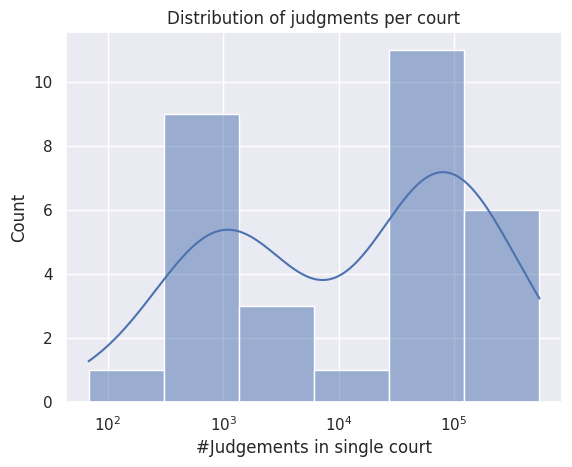

In [4]:
# | eval: false
court_distribution = pl.DataFrame({"court_name": ds["court_name"]}).drop_nulls(subset="court_name").select("court_name").group_by("court_name").len().sort("len", descending=True)
ax = sns.histplot(data=court_distribution, x="len", log_scale=True, kde=True)
ax.set(title="Distribution of judgments per court", xlabel="#Judgements in single court", ylabel="Count")
plt.show()

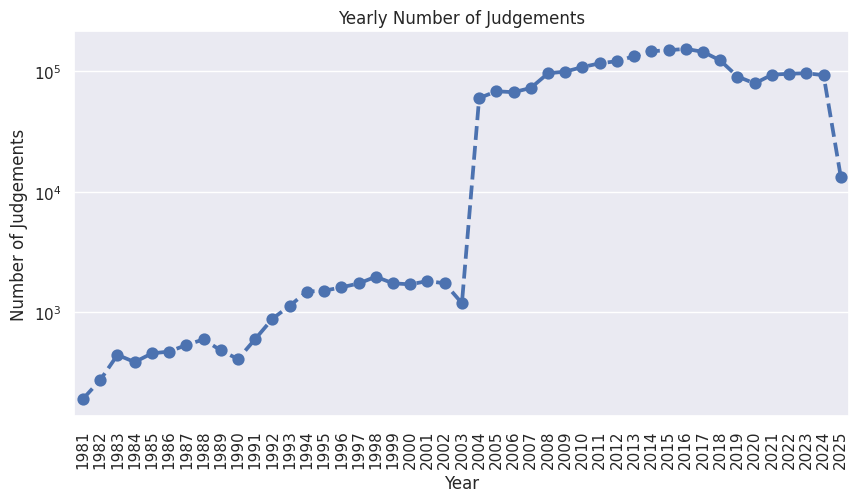

In [5]:
# | eval: false
judgements_per_year = pl.DataFrame({"judgment_date": ds["judgment_date"]})["judgment_date"].dt.year().value_counts().sort("judgment_date")

_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.pointplot(data=judgements_per_year, x="judgment_date", y="count", linestyles="--", ax=ax)
ax.set(xlabel="Year", ylabel="Number of Judgements", title="Yearly Number of Judgements", yscale="log")
plt.xticks(rotation=90)
plt.show()

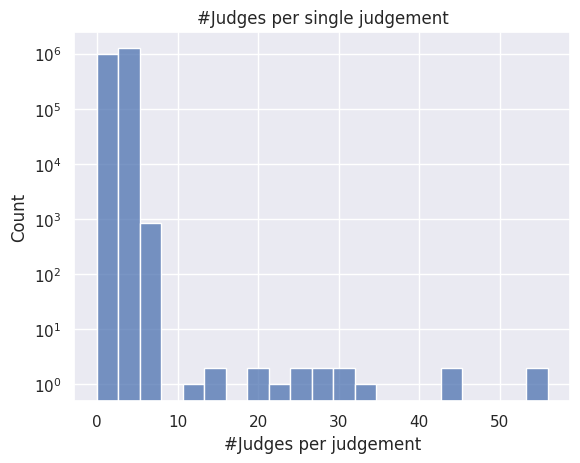

In [6]:
# | eval: false
num_judges = pl.DataFrame({"judges": ds["judges"]}).with_columns([pl.col("judges").list.len().alias("num_judges")]).select("num_judges").sort("num_judges").to_pandas()
ax = sns.histplot(data=num_judges, x="num_judges", bins=num_judges["num_judges"].nunique())
ax.set(xlabel="#Judges per judgement", ylabel="Count", yscale="log", title="#Judges per single judgement")
plt.show()
del num_judges

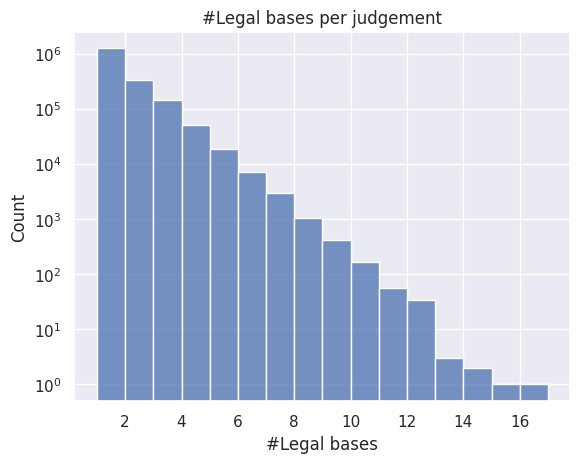

In [7]:
# | eval: false
num_lb = ds.filter(lambda x: x["text_legal_bases"] != None, num_proc=10).map(lambda x: {"num_text_legal_bases": len(x)}, num_proc=10, input_columns=["text_legal_bases"])["num_text_legal_bases"]
num_lb = pd.DataFrame({"num_lb": num_lb})
ax = sns.histplot(data=num_lb, x="num_lb", bins=num_lb["num_lb"].nunique())
ax.set(xlabel="#Legal bases", ylabel="Count", yscale="log", title="#Legal bases per judgement")
plt.show()

### The following analysis is done on 100k random judgements

In [8]:
import random

random.seed(17)
ids = list(range(len(ds)))
random.shuffle(ids)
sample_ids = random.sample(ids, 100_000)

ds = ds.select(sample_ids)

In [9]:
# | eval: false
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")

def tokenize(batch: dict[str, list], column: str) -> list[int]: 
    batch_text = [t if t else "" for t in batch[column]]
    tokenized = tokenizer(batch_text, add_special_tokens=False, return_attention_mask=False, return_token_type_ids=False, return_length=True)
    return {f"{column}_length": tokenized["length"]}

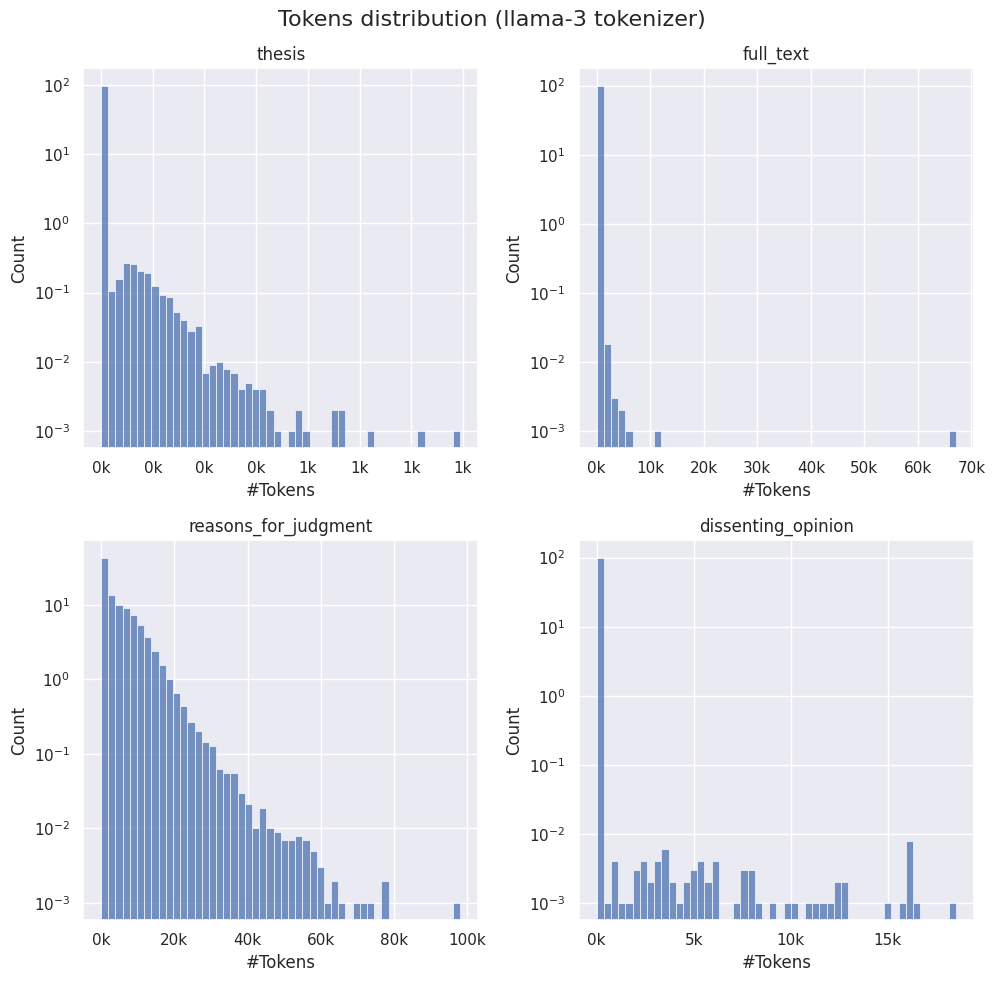

In [10]:
text_features = ["thesis", "full_text", "reasons_for_judgment", "dissenting_opinion"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for feature, ax in zip(text_features, axes.flatten()):
    ds = ds.map(tokenize, fn_kwargs={"column": feature}, batched=True, batch_size=256, num_proc=20)
    full_text_len = ds[f"{feature}_length"]
    sns.histplot(x=full_text_len, bins=50, stat="percent", ax=ax)
    ax.set(xlabel="#Tokens", ylabel="Count", title=feature, yscale="log")
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000)}k'))

fig.suptitle("Tokens distribution (llama-3 tokenizer)", fontsize=16)
fig.tight_layout()
plt.show()